<a href="https://colab.research.google.com/github/Kaushank03/PMB/blob/main/PMB_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pandas scikit-learn openpyxl

Cross Validation Scores: [ 0.0103428   0.01337707  0.00293507  0.01501747 -0.02659188]
Average CV Score: 0.003016105138894454

R2 Score: 0.010878444209061144
Mean Squared Error: 0.15627021557545953

Model Equation:
Default = 0.5094843883150223 + -0.00048335877903093175 * Credit Score


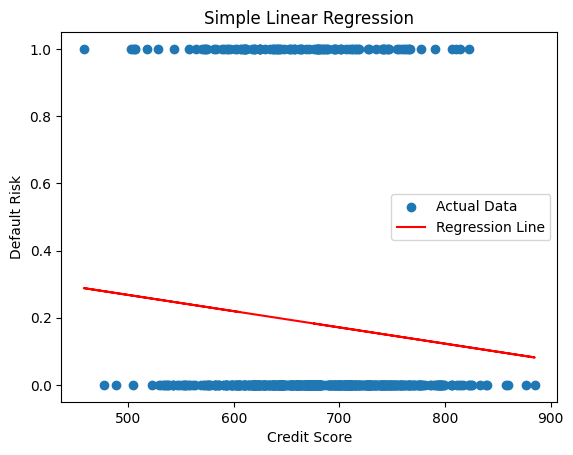

In [4]:
# Advanced Simple Linear Regression – Credit Score Impact

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

# Upload Dataset if not already present
import os
if not os.path.exists("credit_default.xlsx"):
  uploaded = files.upload()
  for filename in uploaded.keys():
    print(f'Uploaded file "{filename}"')

# Load Dataset
data = pd.read_excel("credit_default.xlsx")

# Data Cleaning
data = data.dropna()

# Independent Variable (Single Predictor)
X = data[['Credit_Score']]

# Target Variable
y = data['Default_12M']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Model Creation
model = LinearRegression()

# Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Train Model
model.fit(X_train, y_train)

# Prediction
prediction = model.predict(X_test)

# Evaluation
print("\nR2 Score:", r2_score(y_test, prediction))
print("Mean Squared Error:", mean_squared_error(y_test, prediction))

# Model Equation
print("\nModel Equation:")
print("Default =", model.intercept_,
      "+", model.coef_[0], "* Credit Score")

# Visualization
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, prediction, color='red',
         label="Regression Line")

plt.xlabel("Credit Score")
plt.ylabel("Default Risk")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

Cross Validation Scores: [0.10239464 0.15861737 0.16424605 0.12864583 0.06271565]
Average Accuracy: 0.12332390662383948

R2 Score: 0.16828134673228046
MSE: 0.13140230589793003

Feature Impact:
               Feature   Coefficient
0   Income_Monthly_INR -6.570175e-07
1      EMI_Monthly_INR -6.292525e-08
2  EMI_to_Income_Ratio  6.144651e-01
3         Credit_Score -3.734785e-04
4        Tenure_Months  1.438415e-03
5   Past_Delinquencies  7.835679e-02


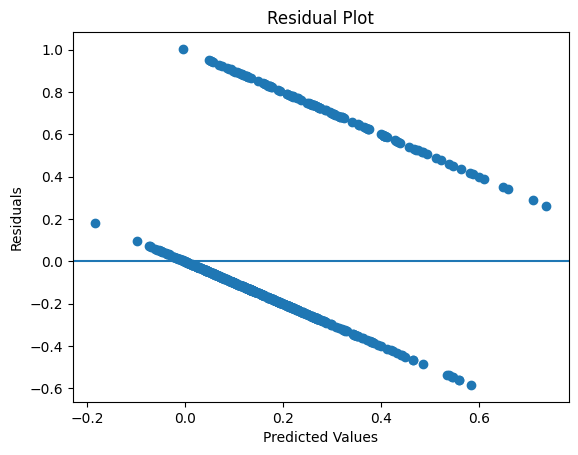

In [5]:
# Advanced Multiple Linear Regression – Credit Risk

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset
data = pd.read_excel("credit_default.xlsx")

# Remove Missing Values
data = data.dropna()

# Features
X = data[['Income_Monthly_INR',
          'EMI_Monthly_INR',
          'EMI_to_Income_Ratio',
          'Credit_Score',
          'Tenure_Months',
          'Past_Delinquencies']]

# Target
y = data['Default_12M']

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Model
model = LinearRegression()

# Cross Validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# Train Model
model.fit(X_train, y_train)

# Prediction
prediction = model.predict(X_test)

# Evaluation
print("\nR2 Score:", r2_score(y_test, prediction))
print("MSE:", mean_squared_error(y_test, prediction))

# Coefficients
coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nFeature Impact:")
print(coef)

# Residual Analysis
residuals = y_test - prediction

plt.scatter(prediction, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [7]:
# Multiple Linear Regression for Credit Risk Analysis

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
data = pd.read_excel("credit_default.xlsx")

# Selecting independent variables
X = data[['Income_Monthly_INR',
          'EMI_Monthly_INR',
          'EMI_to_Income_Ratio',
          'Credit_Score',
          'Tenure_Months',
          'Past_Delinquencies']]

# Target variable
y = data['Default_12M']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Evaluate model
print("R2 Score :", r2_score(y_test, y_pred))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))

R2 Score : 0.16828134673228046
Mean Squared Error : 0.13140230589793003


              precision    recall  f1-score   support

           0       0.83      0.98      0.90       482
           1       0.66      0.16      0.26       118

    accuracy                           0.82       600
   macro avg       0.74      0.57      0.58       600
weighted avg       0.79      0.82      0.77       600



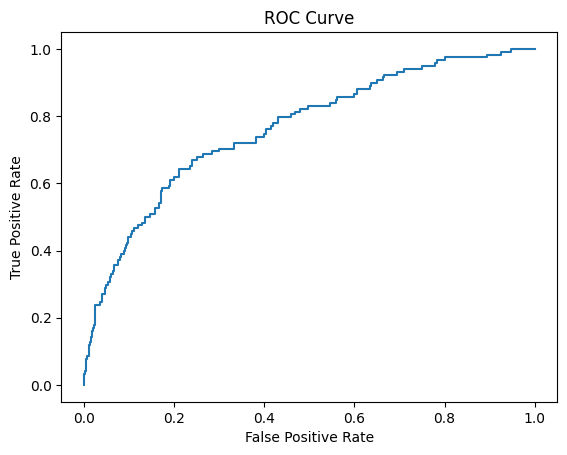

AUC Score : 0.7631338350094944


In [9]:
# ---------------------------------------------------
# LOGISTIC REGRESSION
# Objective:
# Predict probability of customer default
# ---------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,classification_report

data=pd.read_excel("credit_default.xlsx")

X=data.iloc[:,1:-1]
y=data['Default_12M']

X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.20,random_state=42)

model=LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

probability=model.predict_proba(X_test)[:,1]

prediction=model.predict(X_test)

print(classification_report(y_test,prediction))

# ROC Curve
fpr,tpr,_=roc_curve(y_test,probability)

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.show()

print("AUC Score :",auc(fpr,tpr))

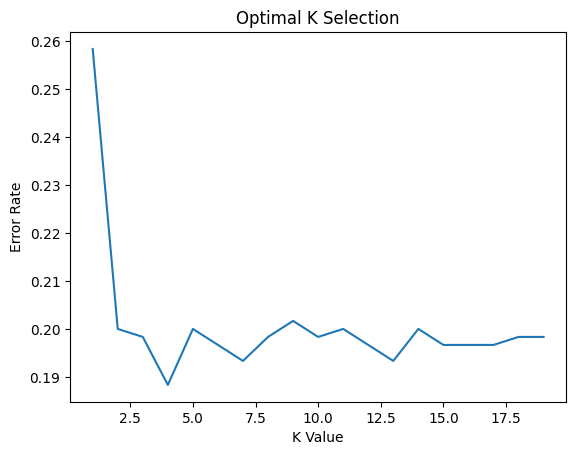

In [10]:
# ---------------------------------------------------
# KNN MODEL
# Objective:
# Identify risky customers using similarity patterns
# ---------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

data=pd.read_excel("credit_default.xlsx")

X=data.iloc[:,1:-1]
y=data['Default_12M']

scaler=StandardScaler()

X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.20,random_state=42)

error=[]

# Finding Best K Value
for k in range(1,20):

    knn=KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train,y_train)

    error.append(1-knn.score(X_test,y_test))

plt.plot(range(1,20),error)

plt.xlabel("K Value")

plt.ylabel("Error Rate")

plt.title("Optimal K Selection")

plt.show()

In [14]:
# --------------------------------------------
# KNN Model for Credit Default Prediction
# --------------------------------------------

# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
data = pd.read_excel("credit_default.xlsx")

# Select independent variables
X = data[['Income_Monthly_INR',
          'EMI_Monthly_INR',
          'EMI_to_Income_Ratio',
          'Credit_Score',
          'Tenure_Months',
          'Past_Delinquencies']]

# Target variable
y = data['Default_12M']

# Scaling is important because KNN uses distance calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42)

# Create KNN Model
model = KNeighborsClassifier(n_neighbors=5)

# Train model
model.fit(X_train, y_train)

# Prediction
prediction = model.predict(X_test)

# Evaluation
print("Accuracy :", accuracy_score(y_test, prediction))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, prediction))

Accuracy : 0.8

Confusion Matrix
[[456  26]
 [ 94  24]]


In [11]:
# ---------------------------------------------------
# NAIVE BAYES
# Objective:
# Probability based credit default prediction
# ---------------------------------------------------

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

data=pd.read_excel("credit_default.xlsx")

X=data.iloc[:,1:-1]
y=data['Default_12M']

model=GaussianNB()

model.fit(X,y)

prediction=model.predict(X)

print(confusion_matrix(y,prediction))

print(classification_report(y,prediction))

# Probability Analysis
prob=model.predict_proba(X)

print("Sample Default Probabilities")

print(prob[:10])

[[2374   71]
 [ 504   51]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2445
           1       0.42      0.09      0.15       555

    accuracy                           0.81      3000
   macro avg       0.62      0.53      0.52      3000
weighted avg       0.75      0.81      0.75      3000

Sample Default Probabilities
[[0.80052301 0.19947699]
 [0.83773773 0.16226227]
 [0.89081918 0.10918082]
 [0.94151925 0.05848075]
 [0.8729647  0.1270353 ]
 [0.87511022 0.12488978]
 [0.83511262 0.16488738]
 [0.79223269 0.20776731]
 [0.82413338 0.17586662]
 [0.79687733 0.20312267]]


In [15]:
# --------------------------------------------
# Decision Tree Model for Credit Risk Analysis
# --------------------------------------------

# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_excel("credit_default.xlsx")

# Independent variables
X = data[['Income_Monthly_INR',
          'EMI_Monthly_INR',
          'EMI_to_Income_Ratio',
          'Credit_Score',
          'Tenure_Months',
          'Past_Delinquencies']]

# Target variable
y = data['Default_12M']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Create Decision Tree Model (CART uses Gini Index)
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
prediction = model.predict(X_test)

# Evaluation
print("Accuracy :", accuracy_score(y_test, prediction))

print("\nClassification Report")
print(classification_report(y_test, prediction))

Accuracy : 0.81

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       482
           1       0.55      0.18      0.27       118

    accuracy                           0.81       600
   macro avg       0.69      0.57      0.58       600
weighted avg       0.77      0.81      0.77       600



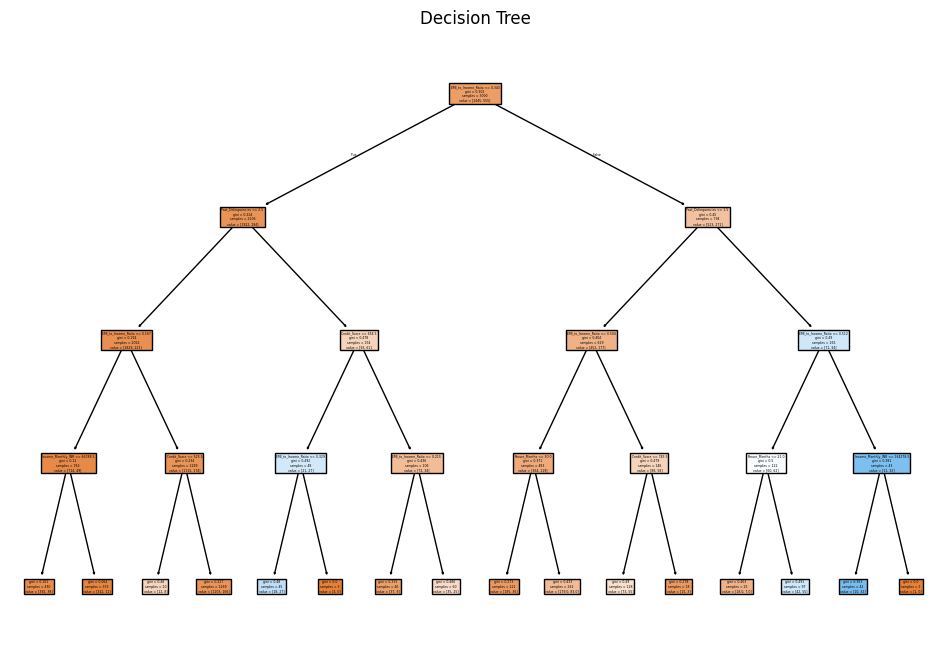

               Feature  Importance
0   Income_Monthly_INR    0.016751
1      EMI_Monthly_INR    0.000000
2  EMI_to_Income_Ratio    0.519244
3         Credit_Score    0.065281
4        Tenure_Months    0.065683
5   Past_Delinquencies    0.333041


In [12]:
# ---------------------------------------------------
# DECISION TREE (CART)
# Objective:
# Customer risk segmentation using rules
# ---------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree

data=pd.read_excel("credit_default.xlsx")

X=data.iloc[:,1:-1]
y=data['Default_12M']

model=DecisionTreeClassifier(
max_depth=4,
random_state=42)

model.fit(X,y)

plt.figure(figsize=(12,8))

plot_tree(model,
feature_names=X.columns,
filled=True)

plt.title("Decision Tree")

plt.show()

# Feature Importance
importance=pd.DataFrame({

"Feature":X.columns,

"Importance":model.feature_importances_

})

print(importance)

In [ ]:
Best Model for Credit Risk Analysis
Logistic Regression is the most suitable model for Credit Risk Analysis.

Reason

Credit default is a binary outcome (Default / No Default), and logistic regression is designed for such problems.

It predicts the probability of default, which helps banks make approval or rejection decisions.

The model is easy to interpret and explain to managers and regulators.

It is widely used in banking credit scoring and risk assessment.

Conclusion: Logistic Regression is best because it provides accurate, interpretable, and probability-based credit risk prediction.



Why Linear Regression is Not Suitable:
Designed for continuous prediction.
Not suitable for binary credit default outcome.
Cannot properly classify risky customers.

Why Multiple Linear Regression is Not Suitable:
Predicts continuous values instead of Default / No Default.
Can give unrealistic outputs (negative or greater than 1).
Assumes linear relationship between variables and risk.
Does not directly predict default probability for classification.

Why KNN is Not Suitable:
Slow with large banking datasets.
Requires feature scaling.
Hard to explain decisions to managers.

Why Naive Bayes is Not Suitable:
Assumes variables are independent.
Financial factors are usually related.
Accuracy may reduce in complex datasets.

Why Decision Tree is Not Best Alone:
Can overfit training data.
Small data changes create different trees.
May not generalize well without tuning.